<a href="https://colab.research.google.com/github/waleedGeorgy/deep-learning/blob/main/Natural_Language_Processing_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# spaCy basics

[spaCy](https://spacy.io/) is an open-source software library for advanced natural language processing, written in Python.

In [ ]:
# importing spacy
import spacy

In [ ]:
# Loading the NLP model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Creating a doc object by applying our loaded model to the string
doc = nlp('There are almost 8 billion people in the world!')

In [ ]:
# Getting the tokens (words) from the string, and printing additional info
# token.pos_ shows parts-of-speech
# token.dep_ shows the syntactic dependancy
for token in doc:
  print(token.text, '-'*5, token.pos_, '-'*5, token.dep_)

There ----- PRON ----- expl
are ----- VERB ----- ROOT
almost ----- ADV ----- advmod
8 ----- NUM ----- compound
billion ----- NUM ----- nummod
people ----- NOUN ----- attr
in ----- ADP ----- prep
the ----- DET ----- det
world ----- NOUN ----- pobj
! ----- PUNCT ----- punct


In [ ]:
# Checking the loaded nlp pipeline
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f4a7b210fa0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f4a7b211a20>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f4a7f639af0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f4a7b286f00>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f4a7af748c0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f4a7f61bae0>)]

More details about spaCy pipeline - https://spacy.io/usage/processing-pipelines

In [ ]:
# Getting only the names of the processes inside the pipeline
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

Working with larger docs can be hard. So it's a good idea to take a span from the doc and work with it seperatly

In [ ]:
doc2 = nlp('The fish listened intently to what the frogs had to say. We have young kids who often walk into our room at night for various reasons including clowns in the closet. I caught my squirrel rustling through my gym bag. Happiness can be found in the depths of chocolate pudding. The golden retriever loved the fireworks each Fourth of July.')

In [ ]:
random_span = doc2[10:20]
random_span

say. We have young kids who often walk into

In [ ]:
type(doc2)

spacy.tokens.doc.Doc

In [ ]:
type(random_span)

spacy.tokens.span.Span

In [ ]:
# Dissecting the document into sentences
for sentence in doc2.sents:
  print(sentence)

The fish listened intently to what the frogs had to say.
We have young kids who often walk into our room at night for various reasons including clowns in the closet.
I caught my squirrel rustling through my gym bag.
Happiness can be found in the depths of chocolate pudding.
The golden retriever loved the fireworks each Fourth of July.


In [ ]:
# Checking if token at position 12 is a start of the sentence
doc2[12].is_sent_start

True

In [ ]:
doc2[13].is_sent_start

False

## Tokenization

Tokenization is the process of breaking-up the original text into components (tokens).
Tokens are the basic building blocks of the doc object that helps us and the machine understand the meaning of the text and the relationship between words.

In [ ]:
mystring = '"We\'re here to help! Please e-mail us at support@company.com, or visit our site: https://www.ourcompany.com!"'
print(mystring)

"We're here to help! Please e-mail us at support@company.com, or visit our site: https://www.ourcompany.com!"


In [ ]:
doc_mystring = nlp(mystring)

for t in doc_mystring:
  print(t)

"
We
're
here
to
help
!
Please
e
-
mail
us
at
support@company.com
,
or
visit
our
site
:
https://www.ourcompany.com
!
"


In [ ]:
# Token indexing
doc_mystring[5]

help

In [ ]:
# Token span
doc_mystring[2:10]

're here to help! Please e-

In [ ]:
# Spacy can recognize named entities
my_string2 = nlp(u'Apple will build a Moscow factory for $9.5 millions.')

for token in my_string2:
  print(token, end = ' | ')

Apple | will | build | a | Moscow | factory | for | $ | 9.5 | millions | . | 

In [ ]:
for entity in my_string2.ents:
  print(entity)
  print(entity.label_)
  print(spacy.explain(entity.label_))
  print('\n')

Apple
ORG
Companies, agencies, institutions, etc.


Moscow
GPE
Countries, cities, states


$9.5 millions
MONEY
Monetary values, including unit




In [ ]:
# spaCy can recognize noun chunks
my_string3 = nlp('Black cars drive on the busy highway on a cloudy night')

for chunck in my_string3.noun_chunks:
  print(chunck)

Black cars
the busy highway
a cloudy night


### Token Visualization

Everything done previously can be done visually using displacy

In [ ]:
from spacy import displacy

In [ ]:
dis_string = nlp(u'Apple will build a Moscow factory for $9.5 millions.')

In [ ]:
# Showing the syntactic dependency between tokens in the doc
displacy.render(dis_string, style = 'dep', jupyter = True, options = {'distance': 100}) # style = 'dep' means we want to see the syntactic dependency

In [ ]:
# Showing the entity of tokens in the doc
displacy.render(dis_string, style = 'ent', jupyter = True, options = {'distance': 100}) # style = 'ent' means we want to see the entities

All of the above can be shown in a browser for example using .serve instead of .render.

options, as the name suggests allow us to customize our visualizations, from the distance between tokens, to zooming capabilities, and coloring, etc.

## Stemming

**Stemming** is the process of cataloging variations of a word, for example: run is the stem for runner, runs, running etc...

The main 2 alogirthms for stemming are the Porter Stemmer, and the Snowball Stemmer, both of which reduce a word to its base form.

spaCy doesn't use a stemmer, only lemmatization, hence we'll use the NLTK library to implement stemming.

In [ ]:
# Using the Porter Stemmer
import nltk
from nltk.stem.porter import PorterStemmer

In [ ]:
# Creating instance of the Porter stemmer
p_stemmer = PorterStemmer()

In [ ]:
words = ['run', 'runner', 'runs', 'ran', 'running', 'fairly', 'fairness', 'sophisticated', 'easily']

In [ ]:
for word in words:
  print(word + ' ------> ' + p_stemmer.stem(word))

run ------> run
runner ------> runner
runs ------> run
ran ------> ran
running ------> run
fairly ------> fairli
fairness ------> fair
sophisticated ------> sophist
easily ------> easili


In [ ]:
# Using the Snowball Stemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# Creating instance of the Snowball stemmer
s_stemmer = SnowballStemmer(language='english')

In [ ]:
for word in words:
  print(word + ' ------> ' + s_stemmer.stem(word))

run ------> run
runner ------> runner
runs ------> run
ran ------> ran
running ------> run
fairly ------> fair
fairness ------> fair
sophisticated ------> sophist
easily ------> easili


##Lemmatization

**Lemmatization** is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

Lemmatization is more sophisticated than stemming in that it looks at a word's part of speech and context in order to group it with other similar words, instead of just reducing it.

For example: mice and mouse, meet and meeting, etc...

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
doc1 = nlp(u"I'm a runner running a race because I love to run since I ran today...")

for token in doc1:
  print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

I            PRON   4690420944186131903    I
'm           AUX    10382539506755952630   be
a            DET    11901859001352538922   a
runner       NOUN   12640964157389618806   runner
running      VERB   12767647472892411841   run
a            DET    11901859001352538922   a
race         NOUN   8048469955494714898    race
because      SCONJ  16950148841647037698   because
I            PRON   4690420944186131903    I
love         VERB   3702023516439754181    love
to           PART   3791531372978436496    to
run          VERB   12767647472892411841   run
since        SCONJ  10066841407251338481   since
I            PRON   4690420944186131903    I
ran          VERB   12767647472892411841   run
today        NOUN   11042482332948150395   today
...          PUNCT  10875615029400813363   ...


##Stop Words

**Stop words** are a set of commonly used words in a language, for examples “a” “the” “is” “are” etc.
Stop words are commonly used in Text Mining and NLP to eliminate words that are so widely used that they carry very little useful information.
The inclusion of such words can potentially harm your NLP research / application.

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
# Get all the stop words
stop_words = nlp.Defaults.stop_words

In [ ]:
print(len(stop_words), stop_words)

326 {'another', 'across', 'than', 'however', 'fifteen', 'forty', 'give', 'upon', 'hereafter', 'be', 'please', 'not', 'as', 'wherever', 'call', 'and', 'with', 'here', 'well', 'perhaps', 'your', 'all', 'none', 'besides', 'show', 'by', 'myself', 'ca', 'can', 'are', 'twenty', 'thereafter', 'done', 'this', 'twelve', '’re', 'through', 'yours', 'everyone', 'she', 'both', 'noone', 'much', 'already', "n't", 'had', 'against', 'except', 'among', 'either', 'me', 'then', 'yourself', 'formerly', '’ll', 'thus', 'did', 'else', 'his', 'they', 'been', 'thereupon', 'throughout', 'rather', "'ve", 'move', 'ourselves', 'my', 'next', 'name', 'on', 'nor', 'moreover', 'how', 'whom', 'bottom', "'re", 'keep', 'just', '’d', 'beforehand', 'herein', 'thence', 'somehow', 'any', 'something', 'less', 'two', '‘d', 'everything', 'mine', 'though', 'make', 'cannot', 'amount', 'an', 'does', 'between', 'anyway', 'herself', 'we', 'towards', 'below', 'is', 'within', 'should', 'nobody', 'whereafter', 'nine', 'doing', 'nothing'

In [ ]:
# Checking if a word is a stop word
print(nlp.vocab['is'])
print(nlp.vocab['is'].is_stop)
print(nlp.vocab['stop'].is_stop)

True
False


In [ ]:
# Adding a custom stop word
nlp.Defaults.stop_words.add('btw')
print(nlp.vocab['btw'].is_stop)

True


In [ ]:
len(stop_words)

327

In [ ]:
# Removing a custom stop word
nlp.Defaults.stop_words.remove('via')
nlp.vocab['via'].is_stop

False

##Token and phrase matching

spaCy offers a way to find words or phrases using custom-made patterns defined by the user.

Compared to using regular expressions on raw text, spaCy’s rule-based matcher engines and components not only let you find the words and phrases you’re looking for – they also give you access to the tokens within the document and their relationships. This means you can easily access and analyze the surrounding tokens, merge spans into single tokens or add entries to the named entities

In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_sm')

In [ ]:
# Creating the matcher object
matcher = Matcher(nlp.vocab)

In [ ]:
# Defining some patterns
# match on solarpower
pattern1 = [{'LOWER': 'solarpower'}]
# match on solar{any punctuation}power
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]
# match on solar power
pattern3 = [{'LOWER': 'solar'}, {'LOWER': 'power'}]

In [ ]:
# Adding the patterns to the matcher
matcher.add('SolarPower', [pattern1, pattern2, pattern3])

In [ ]:
doc = nlp(u'The solar power industry continues to grow as solarpower increases. Solar-power is great!')

In [ ]:
# Finding matcher using the defined matcher
found_matches = matcher(doc)
found_matches

[(8656102463236116519, 1, 3),
 (8656102463236116519, 8, 9),
 (8656102463236116519, 11, 14)]

In [ ]:
# Removing the patterns from the matcher
matcher.remove('SolarPower')

In [ ]:
# Defining some new patterns
pattern1 = [{'LOWER': 'solarpower'}]
# Match using OP - Operator or quantifier to determine how often to match a token pattern
# * means to allow the pattern to match zero or more times.
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}]

In [ ]:
matcher.add('SolarPower', [pattern1, pattern2])

In [ ]:
doc_new = nlp(u'Solar--power is used more as solarpower increases!')

In [ ]:
found_matches = matcher(doc_new)
found_matches

[(8656102463236116519, 0, 3), (8656102463236116519, 7, 8)]

The above can be done with phrases also in a similar fashion

In [ ]:
# importing phrase matcher
from spacy.matcher import PhraseMatcher

In [ ]:
# Creating phrase matcher object
phrase_matcher = PhraseMatcher(nlp.vocab)

In [ ]:
# Opening the text that we want to find matches in
with open('reaganomics.txt') as f:
  text_doc = nlp(f.read())

In [ ]:
# Creating a list of matches
phrase_list = ['voodoo economics', 'supply-side economics', 'trickle-down economics', 'free-market economics']

In [ ]:
# Turning them into patterns
phrase_patterns = [nlp(text) for text in phrase_list]
phrase_patterns

[voodoo economics,
 supply-side economics,
 trickle-down economics,
 free-market economics]

In [ ]:
type(phrase_patterns[0])

spacy.tokens.doc.Doc

In [ ]:
# Adding the patterns to the phrase matcher
phrase_matcher.add('EconomicsMatcher', phrase_patterns)

In [ ]:
# Getting the matches
found_matches = phrase_matcher(text_doc)

In [ ]:
# Outputing information
for match_id, start, end in found_matches:
  string_id = nlp.vocab.strings[match_id] # Name of the matcher
  matched_txt = text_doc[start:end] # Matched text in the doc
  print(match_id, string_id, start, end, matched_txt)

7040560306600519277 EconomicsMatcher 41 45 supply-side economics
7040560306600519277 EconomicsMatcher 49 53 trickle-down economics
7040560306600519277 EconomicsMatcher 54 56 voodoo economics
7040560306600519277 EconomicsMatcher 61 65 free-market economics
7040560306600519277 EconomicsMatcher 673 677 supply-side economics
7040560306600519277 EconomicsMatcher 2990 2994 trickle-down economics


##Parts of Speech

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u'The quick brown fox jumped over the lazy dog\'s back.')

In [ ]:
# With spacy we can get not only each token's part of speach, but also its fine-grained POS
# Meaning of each string code can be found in the documentation
for t in doc:
  print(f'{t.text:{10}} {t.pos_:{10}} {t.tag_:{10}} {spacy.explain(t.tag_)}')

The        DET        DT         determiner
quick      ADJ        JJ         adjective (English), other noun-modifier (Chinese)
brown      ADJ        JJ         adjective (English), other noun-modifier (Chinese)
fox        NOUN       NN         noun, singular or mass
jumped     VERB       VBD        verb, past tense
over       ADP        IN         conjunction, subordinating or preposition
the        DET        DT         determiner
lazy       ADJ        JJ         adjective (English), other noun-modifier (Chinese)
dog        NOUN       NN         noun, singular or mass
's         PART       POS        possessive ending
back       NOUN       NN         noun, singular or mass
.          PUNCT      .          punctuation mark, sentence closer


In [ ]:
# spacy can easily recognize differences in verbs
doc = nlp(u'I read books on NLP.')
doc1 = nlp(u'I read a book on NLP.')

doc_word = doc[1]
doc1_word = doc1[1]

print(doc_word.tag_, spacy.explain(doc_word.tag_))
print(doc1_word.tag_, spacy.explain(doc1_word.tag_))

VBP verb, non-3rd person singular present
VBD verb, past tense


In [ ]:
# We can count the parts of speech in a doc (as well as tags, depndencies, etc..)
doc = nlp(u'The quick brown fox jumped over the lazy dog\'s back.')

POS_counts = doc.count_by(spacy.attrs.POS)
for k, v in sorted(POS_counts.items()):
  print(f'{k}. {doc.vocab[k].text:{5}} {v}')

84. ADJ   3
85. ADP   1
90. DET   2
92. NOUN  3
94. PART  1
97. PUNCT 1
100. VERB  1


In [ ]:
# Now to visualize with displacy
from spacy import displacy

In [ ]:
# This will show us the POS and the SD
displacy.render(doc, style = 'dep', jupyter = True)

In [ ]:
# We can edit our displacy renders with an options dictionary
options = {'distance': 110, 'compact': True, 'color':'yellow', 'bg':'#09a3d5'}

In [ ]:
displacy.render(doc, style = 'dep', jupyter = True, options=options)

##Named Entity Recognition (NER)

**Named Entity Recognition (NER)** is a sub-task of information extraction in NLP that classifies named entities into predefined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, and more.

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
# A function to display any named entities found in a doc
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents:
      print(f'{ent.text:{15}} {ent.label_:{10}} {spacy.explain(ent.label_)}')
  else:
    print('No entities were found.')

In [ ]:
doc = nlp(u'Hello darkness my old friend!')

show_ents(doc)

No entities were found.


In [ ]:
doc = nlp(u'I\'m visiting the Kremlin in Moscow next summer.')

show_ents(doc)

Kremlin         ORG        Companies, agencies, institutions, etc.
Moscow          GPE        Countries, cities, states
next summer     DATE       Absolute or relative dates or periods


In [ ]:
# Adding custom named entities
doc = nlp(u'SpookyScarySkeletons is a company for 5 million dollars.')

show_ents(doc)

5 million dollars MONEY      Monetary values, including unit


In [ ]:
from spacy.tokens import Span

In [ ]:
# Getting the ORG tag from the vocabulary
ORG = doc.vocab.strings[u"ORG"]

# Getting the string we want to turn into a named entity and labling it with the ORG tag
new_entity = Span(doc, 0, 1, label = ORG)

# Adding this new named entity to the doc's vocab
doc.ents = list(doc.ents) + [new_entity]

In [ ]:
show_ents(doc)

SpookyScarySkeletons ORG        Companies, agencies, institutions, etc.
5 million dollars MONEY      Monetary values, including unit


In [ ]:
# Adding different variations of the same NERs
doc = nlp(u"Our company created a brand new vacuum cleaner."
          u"This new vacuum-cleaner os the best in show")

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [ ]:
phrase_list = ["vacuum cleaner", 'vacuum-cleaner']

In [ ]:
phrase_patterns = [nlp(text) for text in phrase_list]
phrase_patterns

[vacuum cleaner, vacuum-cleaner]

In [ ]:
matcher.add("new_prod", phrase_patterns)

In [ ]:
found_matches = matcher(doc)
found_matches

[(5249587105567946509, 6, 8), (5249587105567946509, 11, 14)]

In [ ]:
from spacy.tokens import Span
prod = doc.vocab.strings[u"PRODUCT"]
prod

386

In [ ]:
new_ents = [Span(doc, match[1], match[2], label = prod) for match in found_matches]
new_ents

[vacuum cleaner, vacuum-cleaner]

In [ ]:
doc.ents = list(doc.ents) + new_ents

In [ ]:
show_ents(doc)

vacuum cleaner  PRODUCT    Objects, vehicles, foods, etc. (not services)
vacuum-cleaner  PRODUCT    Objects, vehicles, foods, etc. (not services)


In [ ]:
# Counting the NERs in a doc
doc = nlp(u"Originally I paid $350 for a jacket, but now it is marked down by 30.5 dollars.")

In [ ]:
print([ent for ent in doc.ents if ent.label_ == 'MONEY'])
print(len([ent for ent in doc.ents if ent.label_ == 'MONEY']))

[350, 30.5 dollars]
2


###NER visualization

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u"Over the last quarter, Apple sold nearly 20 thousand iPods for a profit of $500 thousand."
          u"By contrast Sony sold only 8 thousand Walkman music players.")

In [ ]:
displacy.render(doc, style = 'ent', jupyter = True)

In [ ]:
# Showing NERs for individual sentences
for sent in doc.sents:
  displacy.render(sent, style = 'ent', jupyter = True)

In [ ]:
# Styling the visualization
colors = {'ORG':'#aa9cfc', 'PRODUCT':'linear-gradient(90deg, orange, red)'}
options = {'ents':["PRODUCT","ORG"], 'colors':colors}

displacy.render(doc, style = 'ent', jupyter = True, options = options)

##Sentence Segmentation

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u"This is the first sentence. This is another sentence. This is the last sentence.")

In [ ]:
for sent in doc.sents:
  print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [ ]:
# Defining custom sentence segmentation rules
doc = nlp(u'"Management is doing the right things; leadership is doing the right things." -Peter Drucker')
doc

"Management is doing the right things; leadership is doing the right things." -Peter Drucker

In [ ]:
for sent in doc.sents:
  print(sent)
  print()

"Management is doing the right things; leadership is doing the right things."

-Peter Drucker



We can add new segmentation rules, or change the entire segmentation set of rules

In [ ]:
from spacy.language import Language

# Adding segmentation rules
@Language.component("custom_boundaries")
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == ';':
            doc[token.i+1].is_sent_start = True
    return doc

nlp.add_pipe("custom_boundaries", before='parser')

<function __main__.set_custom_boundaries(doc)>

In [ ]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'custom_boundaries',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [ ]:
doc_new = nlp(u'"Management is doing the right things; leadership is doing the right things." -Peter Drucker')
# Now the spacy pipeline segments the doc on our custom defined segmentation rule
for sent in doc_new.sents:
  print(sent)
  print()

"Management is doing the right things;

leadership is doing the right things."

-Peter Drucker



In [ ]:
# Changing the segmentation rules
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u"This is a sentence. This is another.\n\nThis is a \nthird sentence.")

for sent in doc.sents:
    print(sent)

This is a sentence.
This is another.


This is a 
third sentence.


In [ ]:
config = {"punct_chars": ["\n", "\n\n"]}
nlp.add_pipe("sentencizer", config=config, first=True)

In [ ]:
nlp.pipe_names

['sentencizer',
 'tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [ ]:
doc = nlp(u"This is a sentence. This is another.\n\nThis is a \nthird sentence.")

for sent in doc.sents:
    print(sent)

This is a sentence. This is another.


This is a 

third sentence.


#Text Feature Extraction

Machine and deep learning models can't work with raw text data, so it is important that any text data is transformed into a format that these models can understand and work with.

Hence, in NLP applications, **text vectorization** is used. which is an approach of converting input data from its raw text format into vectors of real numbers.

Text vectorizatrion can be achieved with a **bag of words**, **TD-IDF**, **text embedding**, etc...

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Spam vs Ham messages dataset
df = pd.read_csv('smsspamcollection.tsv', sep ='\t')

df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
# Checking for missing values
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
# Checking the values of the labels
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
# Getting the features and labels
X = df['message']
y = df['label']

In [7]:
# Splitting data in to train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

**CountVectorizer** is a text preprocessing technique commonly used in NLP tasks for converting a collection of text documents into a numerical representation.

In [8]:
# Importing CountVectorizer (Bag of Words) and creating an instance of it
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [9]:
# Vectorizing the X_train text data
X_train_counts = vectorizer.fit_transform(X_train)

X_train_counts

<3733x7082 sparse matrix of type '<class 'numpy.int64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [10]:
X_train.shape, X_train_counts.shape

((3733,), (3733, 7082))

Now that we have vectorized our raw text data, we will use TF-IDF.

**Term Frequency - Inverse Document Frequency (TF-IDF)** is a widely used statistical method in NLP and information retrieval. It measures how important a term is within a document relative to a collection of documents (i.e., relative to a corpus).

We use TF-IDF to reduce the importance of the common words giving more attention to words that are less frequent in the texts.

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_idf_transformer = TfidfTransformer()

In [12]:
X_train_tfidf = tf_idf_transformer.fit_transform(X_train_counts)

In [13]:
X_train_tfidf.shape

(3733, 7082)

Using CountVectorization with TF-IDF is so common, that there exists the TfidfVectorizer which performs the two steps simultaneously.

Now that we have the raw text data in the appropriate format, we use a SVM classifier LinearSVC

In [14]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

clf.fit(X_train_tfidf, y_train)

LinearSVC()

Since we want to test our model on the test data we naturally need to also transform it using the steps performed above, but this process could be tiresome, especially if said process is too long, or we constantly recieve new data.

In NLP, it is very common to build a pipeline that will handle all the steps required for the NLP application with a single call.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())])

In [19]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [20]:
# Testing our model on the test data and making predictions
preds = text_clf.predict(X_test)

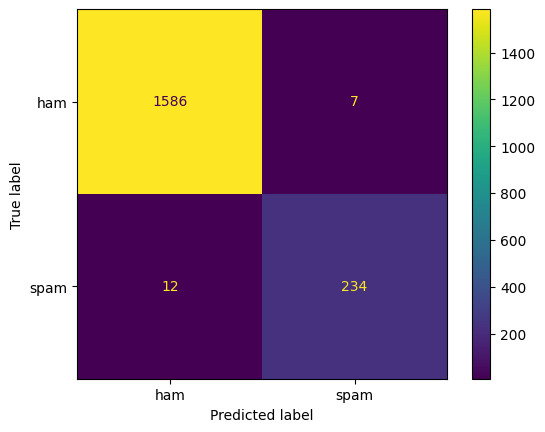

In [30]:
# Evaluating our model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Displaying the confusion matrix
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = text_clf.classes_)

disp.plot();

In [23]:
# Printing a classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [24]:
# Reporting the accuracy of the model
from sklearn import metrics
metrics.accuracy_score(y_test, preds)

0.989668297988037

In [31]:
# Let's test our model on some new custom data
text_clf.predict(["Hi there! How are you doing today?"])

array(['ham'], dtype=object)

In [32]:
text_clf.predict(["Congratulation! You have won $10,000! Please contact us to recieve your prize money!"])

array(['spam'], dtype=object)

## End-to-end text classification project

In [33]:
import numpy as np
import pandas as pd

df = pd.read_csv('moviereviews.tsv', sep = '\t')


df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [34]:
# Checking for missing values
df.isnull().sum()

label      0
review    35
dtype: int64

In [38]:
# Dropping the missing values
df.dropna(inplace = True)

In [39]:
df.isnull().sum()

label     0
review    0
dtype: int64

Somtimes, in real-world datasets, missing values will be replaced with empty spaces, so we need to account for these too.

In [40]:
blanks = []

for i, label, review in df.itertuples():
  if review.isspace():
    blanks.append(i)

blanks

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [41]:
# Now let's drop the empty entries
df.drop(blanks, inplace = True)

In [42]:
df.shape

(1938, 2)

In [43]:
# Getting the features and labels from our dataset and creating a train-test split
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [44]:
# Creating the NLP pipeline and training the model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())])

text_clf.fit(X_train, y_train)

y_preds = text_clf.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         neg       0.85      0.83      0.84       282
         pos       0.85      0.86      0.85       300

    accuracy                           0.85       582
   macro avg       0.85      0.85      0.85       582
weighted avg       0.85      0.85      0.85       582



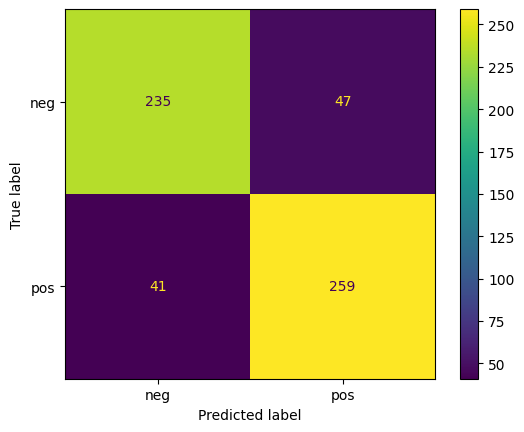

In [46]:
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = text_clf.classes_)

disp.plot();

In [48]:
accuracy_score(y_test, y_preds)

0.8487972508591065

In [49]:
text_clf.predict(['This movie was good! I had great time watching it with my family'])

array(['pos'], dtype=object)

In [50]:
text_clf.predict(['This movie could\'ve been better. I was expecting more to be honest after the initial trailer hype.'])

array(['neg'], dtype=object)